In [5]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Define the path to the animal image folders
base_folder = r'D:\animal_detection\train'



In [6]:
# List of animal emotion categories
categories = ['cats', 'dog', 'parrot', 'horse', 'hamster', 'sheep']

# Load and preprocess images for each animal class
images = []
labels = []

for label, category in enumerate(categories, 1):
    folder_path = os.path.join(base_folder, category)
    for filename in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, filename))
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (128, 128))  # Resize to 128x128
            images.append(img)
            labels.append(label)

# Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)


In [ ]:
# Normalize pixel values
images = images.astype('float32') / 255.0

# One-hot encode the labels
labels_one_hot = to_categorical(labels - 1, len(categories))  # Subtract 1 to start labels from 0

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels_one_hot, test_size=0.2, random_state=42)

from tensorflow.keras.models import Model

# Load pre-trained VGG16 model without classification layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the convolutional base
base_model.trainable = False

# Get the output tensor of the last convolutional layer in the base model
last_layer_output = base_model.output

# Flatten the output tensor
flatten_layer = Flatten()(last_layer_output)

# Add additional layers for classification
dense_layer_1 = Dense(256, activation='relu')(flatten_layer)
dropout_layer = Dropout(0.5)(dense_layer_1)
output_layer = Dense(len(categories), activation='softmax')(dropout_layer)

# Create a new model
model = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy * 100:.2f}%')

# Save the model
model.save("improved_animal_classification_model.h5")

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step


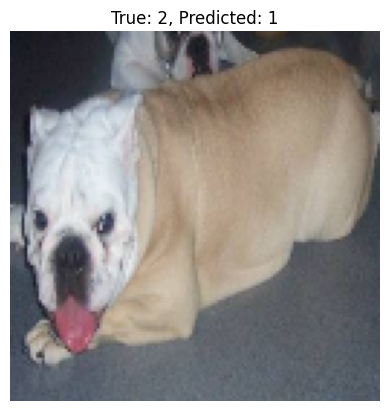

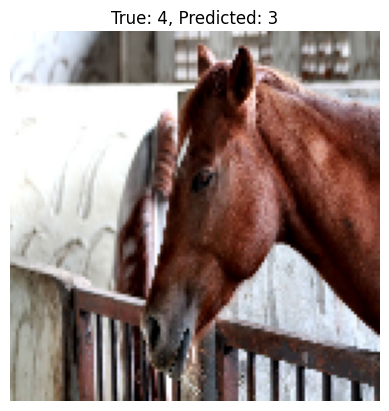

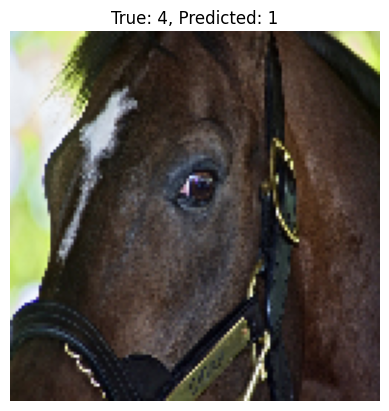

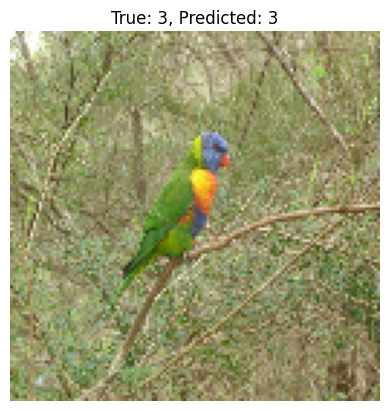

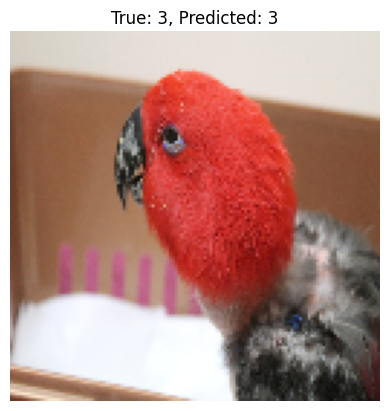

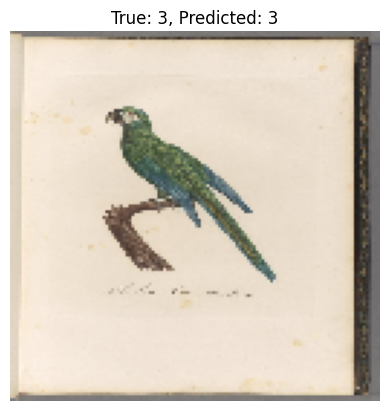

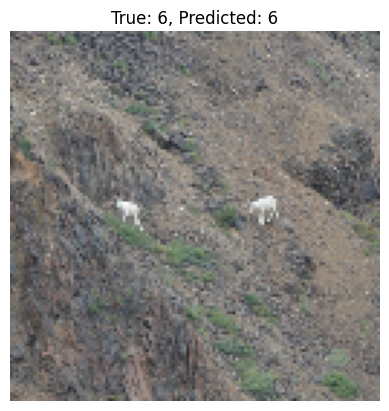

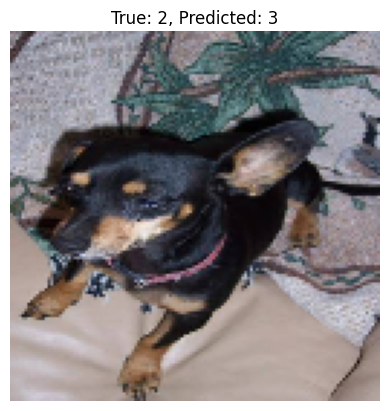

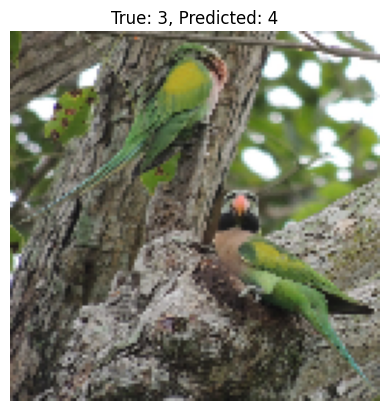

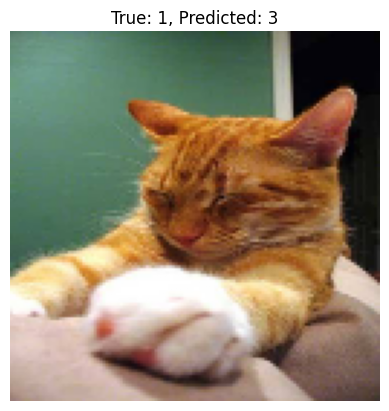

In [8]:
"""
Label Mapping:
- Label 1: Cat
- Label 2: Dog
- Label 3: Parrot
- Label 4: Horse
- Label 5: Hamster
- Label 6: Sheep
"""

import matplotlib.pyplot as plt
import numpy as np

# Predict on the test set
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1) + 1  # Convert one-hot encoded predictions to labels

# Convert one-hot encoded true labels to labels
true_labels = np.argmax(y_test, axis=1) + 1

# Visualize the first 10 test images with their predicted and true labels
for i in range(10):
    plt.imshow(X_test[i])
    plt.title(f"True: {true_labels[i]}, Predicted: {predicted_labels[i]}")
    plt.axis('off')
    plt.show()


In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Define the path to the animal image folders
base_folder = r'D:\animal_detection\train'


# List of animal categories
categories = ['cats', 'dog', 'parrot', 'horse', 'hamster', 'sheep']

# Load and preprocess images for each animal class
images = []
labels = []

for label, category in enumerate(categories, 1):
    folder_path = os.path.join(base_folder, category)
    for filename in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, filename))
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (128, 128))  # Resize to 128x128
            images.append(img)
            labels.append(label)

# Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Normalize pixel values
images = images.astype('float32') / 255.0

# One-hot encode the labels
labels_one_hot = to_categorical(labels - 1, len(categories))  # Subtract 1 to start labels from 0

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels_one_hot, test_size=0.2, random_state=42)

from tensorflow.keras.models import Model

# Load pre-trained VGG16 model without classification layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the convolutional base
base_model.trainable = False

# Get the output tensor of the last convolutional layer in the base model
last_layer_output = base_model.output

# Flatten the output tensor
flatten_layer = Flatten()(last_layer_output)

# Add additional layers for classification
dense_layer_1 = Dense(256, activation='relu')(flatten_layer)
dropout_layer = Dropout(0.5)(dense_layer_1)
output_layer = Dense(len(categories), activation='softmax')(dropout_layer)

# Create a new model
model = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy * 100:.2f}%')

# Save the model
model.save("improved_animal_classification_model.h5")


Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 88s 3s/step - accuracy: 0.3890 - loss: 2.1965 - val_accuracy: 0.6607 - val_loss: 1.0498
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.6877 - loss: 0.8894 - val_accuracy: 0.7054 - val_loss: 0.9035
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.7768 - loss: 0.6718 - val_accuracy: 0.6964 - val_loss: 0.8038
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.8120 - loss: 0.5246 - val_accuracy: 0.6786 - val_loss: 0.8590
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.8175 - loss: 0.5044 - val_accuracy: 0.6875 - val_loss: 0.8008
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.8458 - loss: 0.4206 - val_accuracy: 0.6964 - val_loss: 0.7504
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.9084 - loss: 0.3015 - val_accuracy: 0.6964 - val_loss: 0.9015
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.9020 - loss: 0.2790 - val_accuracy: 0.7232 - val_loss:

Test accuracy: 79.21%


'# Build the CNN model\nmodel = Sequential([\n    Conv2D(32, (3, 3), activation=\'relu\', input_shape=(128, 128, 3)),\n    MaxPooling2D((2, 2)),\n    Conv2D(64, (3, 3), activation=\'relu\'),\n    MaxPooling2D((2, 2)),\n    Flatten(),\n    Dense(128, activation=\'relu\'),\n    Dropout(0.5),\n    Dense(len(categories), activation=\'softmax\')\n])\n\n# Compile the model\nmodel.compile(optimizer=\'adam\', loss=\'categorical_crossentropy\', metrics=[\'accuracy\'])\n\n# Train the model\nhistory = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)\n\n# Evaluate the model\nloss, accuracy = model.evaluate(X_test, y_test)\nprint(f\'Test accuracy: {accuracy * 100:.2f}%\')\n\n# Save the model\nmodel.save("animal_classification_model.h5")\n'